# Context:
The data set has information about features of silhouette extracted from the images of different cars
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 
cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars 
would be readily distinguishable, but it would be more difficult to distinguish between the cars.

Here let's apply both Hierarchial and K-Means Clustering.

# Import the necessary libraries and load the dataset.

In [211]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv('vehicle.csv')


# Q1. Check for missing values in the dataset.

In [213]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

# Q2. Drop the missing values.
### Note: [Use the dataset thus created after dropping missing values for the clustering algorithms.]

In [215]:
df.dropna(inplace=True)
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [217]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

# Q3. Check the shape (rows and columns), info and the basic measures of descriptive statistics from the data.

In [219]:
df.shape

(813, 19)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

In [223]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,cluster
count,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,93.656827,44.803198,82.04305,169.098401,61.774908,8.599016,168.563346,40.98893,20.558426,147.891759,188.377614,438.382534,174.252153,72.399754,6.351784,12.687577,188.979090,195.729397,1.354244
std,8.233751,6.146659,15.78307,33.615402,7.973000,4.677174,33.082186,7.80338,2.573184,14.504648,31.165873,175.270368,32.332161,7.475994,4.921476,8.926951,6.153681,7.398781,0.478578
min,73.000000,33.000000,40.00000,104.000000,47.000000,2.000000,112.000000,26.00000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,1.000000
25%,87.000000,40.000000,70.00000,141.000000,57.000000,7.000000,146.000000,33.00000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,6.000000,184.000000,191.000000,1.000000
50%,93.000000,44.000000,79.00000,167.000000,61.000000,8.000000,157.000000,43.00000,20.000000,146.000000,179.000000,364.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000,1.000000
75%,100.000000,49.000000,98.00000,195.000000,65.000000,10.000000,198.000000,46.00000,23.000000,159.000000,217.000000,586.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000,2.000000
max,119.000000,59.000000,112.00000,333.000000,138.000000,55.000000,265.000000,61.00000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000,2.000000


# Q4. Print/Plot the dependent (categorical variable) and Check for any missing values in the data

In [225]:
df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

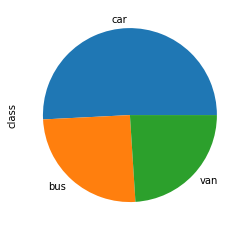

In [227]:
pd.value_counts(df['class']).plot(kind='pie')
plt.show()

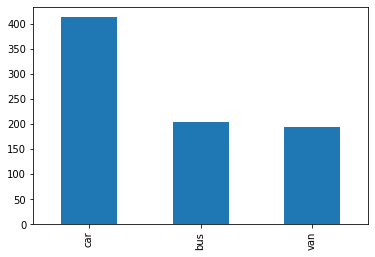

In [229]:
pd.value_counts(df['class']).plot(kind='bar')
plt.show()

# Q4. Standardize the data.

Drop the categorical variable before clustering the data.

In [231]:
numdf = df.iloc[:, 1:18]
numdf.head()

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


Option 1: Standardize the data using StandardScaler

In [233]:
x = StandardScaler()
scaledDf = x.fit_transform(numdf)
scaledDf

array([[ 0.52040788,  0.06066872,  0.26497017, ...,  0.37128716,
        -0.3218087 ,  0.17183708],
       [-0.61912319,  0.12406675, -0.83639333, ...,  0.14710858,
         0.00340009,  0.44231829],
       [ 0.84598818,  1.51882349,  1.18773418, ..., -0.41333788,
        -0.1592043 ,  0.03659647],
       ...,
       [ 1.49714879,  1.20183332,  1.57469973, ..., -0.97378433,
        -0.3218087 ,  0.7127995 ],
       [-1.43307395, -0.25632145, -0.68756042, ...,  1.38009078,
         0.16600449, -0.09864413],
       [-1.43307395, -1.01709784, -1.37219178, ...,  0.59546574,
        -0.4844131 , -0.77484716]])

In [235]:
# Scaleddf will be a numpy array, we need to convert it to a DF to know it's describe

scaledDf = pd.DataFrame(scaledDf, index=numdf.index, columns = numdf.columns)
scaledDf

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.944703,0.314261,0.413803,0.279250,-0.128151,0.013207,-0.126809,-0.217151,-0.958335,0.373150,-0.093528,-0.781504,-0.053505,0.131793,1.380091,-0.159204,-0.098644
842,0.194828,0.124067,-0.181529,0.530251,0.513657,-0.289256,0.257876,-0.217151,0.766312,-0.493716,-0.401813,0.054092,-0.053505,-1.088104,0.819644,-0.484413,0.171837
843,1.497149,1.201833,1.574700,0.655752,0.727593,1.616264,-1.409094,1.727163,1.732113,1.272121,1.613458,0.796844,-0.321192,-0.681472,-0.973784,-0.321809,0.712800
844,-1.433074,-0.256321,-0.687560,-0.473753,-0.342087,-1.015169,1.155476,-0.994877,-1.648193,-1.071626,-0.961293,-0.812452,-0.856567,-1.291420,1.380091,0.166004,-0.098644


In [237]:
scaledDf.describe().round(0)

# Yes, the mean is ~0 and StdDev ~1 it proves that the rows were scaled.

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,813.0,813.0,813.0,813.0,813.0,813.0,813.0,813.0,813.0,813.0,813.0,813.0,813.0,813.0,813.0,813.0,813.0
mean,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-3.0,-2.0,-2.0,-1.0,-2.0,-2.0,-1.0,-2.0,-2.0,-1.0,-2.0,-2.0,-1.0,-1.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
75%,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
max,2.0,2.0,5.0,10.0,10.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,8.0,3.0,3.0,3.0,2.0


Option 2: Standdarize data using Z-Score

In [239]:
scaledDf = numdf.apply(zscore)
scaledDf.head()

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


# Q5. Perform Hierarchical Clustering with the Ward's linkage method and plot the dendrogram.
#### Note: Please do go ahead and explore other parameters under the linkage function in the Scientific Python library. 

In [241]:
hierclust = linkage(scaledDf, method='ward')

In [243]:
# dend = dendrogram(hierclust)

# Q6. Plot the truncated dendrogram with the last 25 clusters.

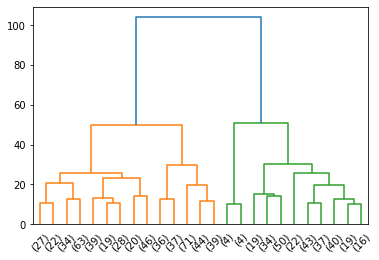

In [245]:
dend = dendrogram(hierclust, truncate_mode='lastp', p=25)

# Q7. Identify the number of clusters based on the dendrogram and add the cluster numbers to the original dataframe.

In [247]:
from scipy.cluster.hierarchy import fcluster

Method 1

In [249]:
clusters1 = fcluster(hierclust, 2, criterion='maxclust')
clusters1

array([1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1,

Method 2

In [251]:
clusters2 = fcluster(hierclust, 60, criterion = 'distance')
clusters2

array([1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1,

In [253]:
# Check whether the length of clusters is same as in Method1 and Method2

np.array_equal(clusters1, clusters2)

True

In [254]:
df['cluster'] = clusters1
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,cluster,KMeans_Clusters
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,...,379.0,184.0,70.0,6.0,16.0,187.0,197,van,1,0
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,...,330.0,158.0,72.0,9.0,14.0,189.0,199,van,1,0
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,...,635.0,220.0,73.0,14.0,9.0,188.0,196,car,2,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,...,309.0,127.0,63.0,6.0,10.0,199.0,207,van,1,0
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,...,325.0,188.0,127.0,9.0,11.0,180.0,183,bus,2,1


# Q8. Export the dataframe thus created with the clusters into a csv file.

In [255]:
df.to_csv('h_cluster.csv')

# Q9. Perform the K-Means clustering with 2 clusters.

In [256]:
k_means = KMeans(n_clusters=2, random_state=1)
k_means.fit(scaledDf)
labels = k_means.labels_
labels

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,

# Q10. Find out the within cluster sum of squares for 2 clusters for the K-Means algorithm.

In [257]:
k_means.inertia_

8284.544157884231

# Q11. Perform the K-Means clustering with 3 clusters and find out the within cluster sum of squares.

In [258]:
k_means = KMeans(n_clusters=3, random_state=1)
k_means.fit(scaledDf)
k_means.inertia_

6766.1994211640485

# Q13. Find the Within Sum of Squares (WSS) for 2 to 15 clusters.

In [259]:
wss = []

for i in range(1, 15):
    k_means = KMeans(n_clusters=i, random_state=1)
    k_means.fit(scaledDf)
    wss.append(k_means.inertia_)
wss

[13820.999999999995,
 8284.544157884231,
 6766.1994211640485,
 5479.288387318304,
 4942.694679452492,
 4460.366382714967,
 4123.637520794311,
 3905.0199450784003,
 3650.3851530796396,
 3444.6203499446665,
 3280.2307911378703,
 3141.172457244344,
 3025.6810655859217,
 2911.711564859647]

# Q14. Plot the Within Sum of Squares (WSS) plot using the values of 'inertia' computed in the last question.

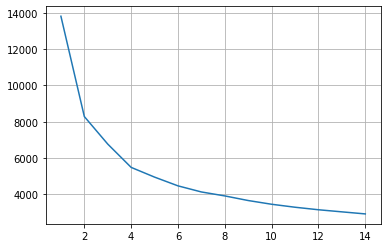

In [260]:
plt.plot(range(1, 15), wss)
plt.grid()
plt.show()

# Q15. Find the optimum number of clusters from the WSS plot in the previous question.

In [261]:
# check with 2 clusters
k_means_2 = KMeans(n_clusters=2, random_state=1)
k_means_2.fit(scaledDf)
labels_2 = k_means_2.labels_
labels_2

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,

In [262]:
# check with 4 clusters
k_means_4 = KMeans(n_clusters=4, random_state=1)
k_means_4.fit(scaledDf)
labels_4 = k_means_4.labels_
labels_4

array([0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 3, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2, 1,
       2, 2, 1, 2, 3, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 1, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2,
       0, 1, 2, 2, 3, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 2, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,

# Q16. Check the average silhouette score and silhouette width of the cluster(s) thus created.

In [263]:
# df.drop('cluster', axis=1, inplace=True)
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,cluster,KMeans_Clusters
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,...,379.0,184.0,70.0,6.0,16.0,187.0,197,van,1,0
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,...,330.0,158.0,72.0,9.0,14.0,189.0,199,van,1,0
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,...,635.0,220.0,73.0,14.0,9.0,188.0,196,car,2,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,...,309.0,127.0,63.0,6.0,10.0,199.0,207,van,1,0
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,...,325.0,188.0,127.0,9.0,11.0,180.0,183,bus,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,...,422.0,149.0,72.0,7.0,25.0,188.0,195,car,1,0
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,...,368.0,176.0,72.0,1.0,20.0,186.0,197,van,1,0
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,...,721.0,200.0,70.0,3.0,4.0,187.0,201,car,2,1
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,...,270.0,148.0,66.0,0.0,25.0,190.0,195,car,1,0


In [264]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [265]:
silhouette_score(scaledDf, labels)

0.3876266273590653

In [266]:
silhouette_samples(scaledDf, labels).min()

-0.0029749429279927113

In [267]:
silhouette_score(scaledDf, labels_4)

0.3078946434532808

In [268]:
silhouette_samples(scaledDf, labels_4).min()

-0.030880756173145854

# Q17. Add the cluster labels to the dataset which has the cluster labels of Hierarchical Clustering.

In [269]:
df['KMeans_Clusters'] = labels

In [270]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,cluster,KMeans_Clusters
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,...,379.0,184.0,70.0,6.0,16.0,187.0,197,van,1,0
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,...,330.0,158.0,72.0,9.0,14.0,189.0,199,van,1,0
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,...,635.0,220.0,73.0,14.0,9.0,188.0,196,car,2,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,...,309.0,127.0,63.0,6.0,10.0,199.0,207,van,1,0
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,...,325.0,188.0,127.0,9.0,11.0,180.0,183,bus,2,1


# Q18. Export the new dataframe with both the cluster labels of Hierarchical Clustering and K-Means clustering into a csv. Do not include the 'class' variable in this particular dataframe. 

In [271]:
df.to_csv('cluster.csv')